In [24]:
!cd /home/ubuntu/Ai/yolov5-magik/

/home/ubuntu/Ai/yolov5-magik


# 32Bit Training

In [25]:
!sed -i 's/bita = .*/bita = 32/g' ./models/common.py
!sed -i 's/nc: .*/nc: 2/g' ./models/yolov5s.yaml
!export NCCL_IB_DISABLE=1
!export NCCL_DEBUG=info

In [26]:
!python3 -m torch.distributed.launch --nproc_per_node=1 --master_port=60051 train.py \
    --data data/baby-nc2.yaml\
    --cfg models/yolov5s.yaml \
    --weights '' \
    --batch-size 8 \
    --hyp data/hyp.scratch.yaml \
    --project ./runs/train/baby-nc2-32bit \
    --epochs 300 \
    --device 0

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
train: weights=, cfg=models/yolov5s.yaml, data=data/baby-nc2.yaml, hyp=data/hyp.scratch.yaml, epochs=300, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=./runs/train/baby-nc2-32bit, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=0
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Added key: store_based_barrier_key:1 to store for rank: 0
hyperparameters: lr0=0.01, lrf=0.02, momentum=0.937, weight_decay=1e-05, warmup_epochs=3.0, warmup_momentu

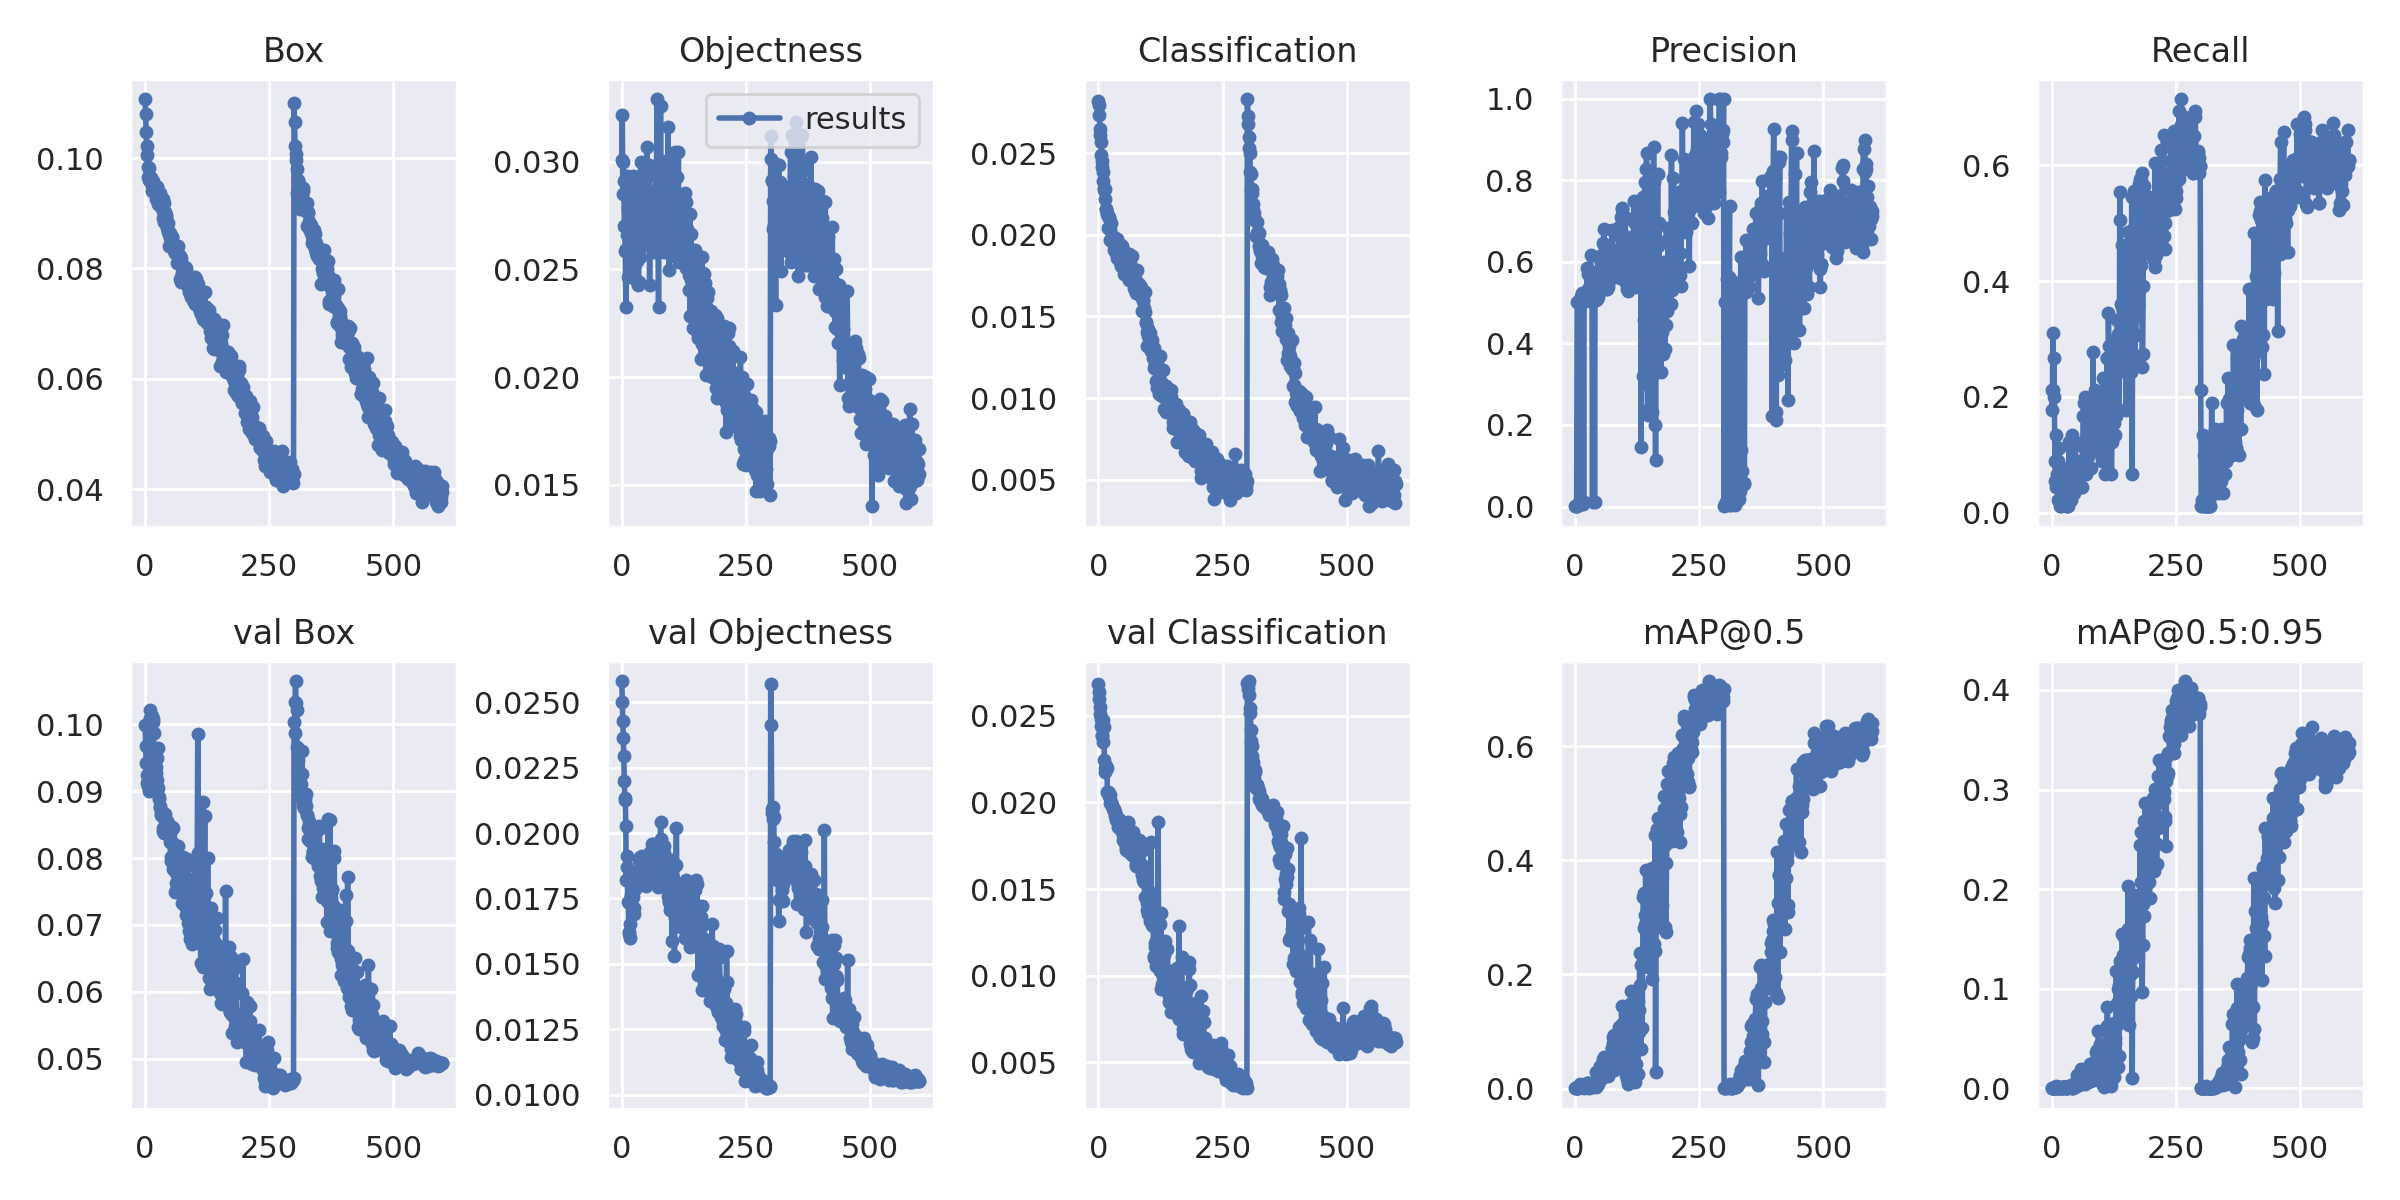

In [40]:
from IPython.display import Image, clear_output
Image(filename='runs/train/baby-nc2-32bit/results.png', width=400)

In [27]:
!python test.py --data data/baby-nc2.yaml --weights ./runs/train/baby-nc2-32bit/weights/best.pt --imgs 640 --device 0 --batch-size 6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
test: data=data/baby-nc2.yaml, weights=['./runs/train/baby-nc2-32bit/weights/best.pt'], batch_size=6, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Fusing layers... 
Model Summary: 507 layers, 7066239 parameters, 0 gradients
test.py:nc: 2
##########################################1
val: Scanning '../datasets/baby_nc2/valid/labels.cache' images and labels... 40 
##########################################2
batch_size: 6
               Class     Images     Labels          P          R     mAP@.5 mAP@prediction.shape: torch.Size([6, 18522, 7])
prediction:nc 2
               Class     Images     Labels          P          R     mAP@.5 mAP@p

In [28]:
!python detect.py --source data/images/baby.jpg --weights ./runs/train/baby-nc2-32bit/weights/best.pt --img 640 --device 0 --conf-thres 0.3 --iou-thres 0.6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
detect: weights=['./runs/train/baby-nc2-32bit/weights/best.pt'], source=data/images/baby.jpg, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=1000, device=0, view_img=True, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
save_img=True
webcam=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

weights=./runs/train/baby-nc2-32bit/weights/best.pt
chkpt={'nc': 2, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Focus', [64, 3]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 9, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9,

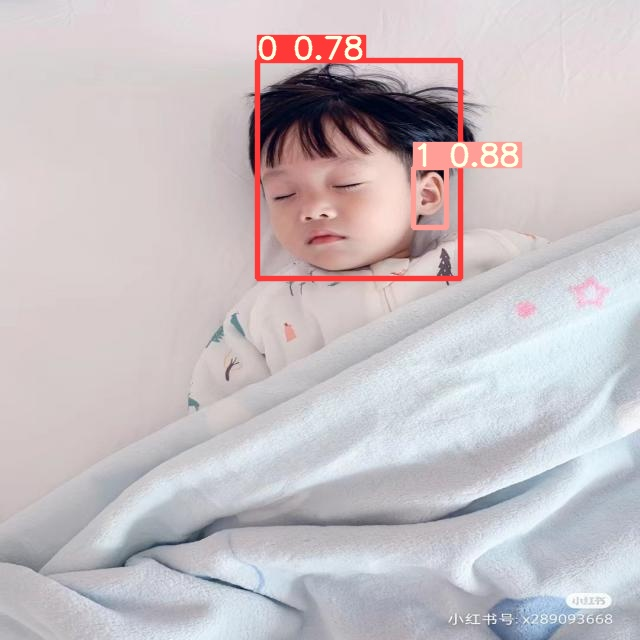

In [31]:
Image(filename='runs/detect/exp7/baby.jpg', width=600)

# 8Bit Training

In [35]:
!sed -i 's/bita = .*/bita = 8/g' ./models/common.py
!sed -i 's/nc: .*/nc: 2/g' ./models/yolov5s.yaml
!export NCCL_IB_DISABLE=1
!export NCCL_DEBUG=info
!python3 -m torch.distributed.launch --nproc_per_node=1 --master_port=60051 train.py \
    --data data/baby-nc2.yaml\
    --cfg models/yolov5s.yaml \
    --weights './runs/train/baby-nc2-32bit/weights/best.pt' \
    --batch-size 8 \
    --hyp data/hyp.scratch-8bit.yaml \
    --project ./runs/train/baby-nc2-8bit \
    --epochs 300 \
    --device 0

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
train: weights=./runs/train/baby-nc2-32bit/weights/best.pt, cfg=models/yolov5s.yaml, data=data/baby-nc2.yaml, hyp=data/hyp.scratch-8bit.yaml, epochs=300, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=./runs/train/baby-nc2-8bit, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=0
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Added key: store_based_barrier_key:1 to store for rank: 0
hyperparameters: lr0=0.01, lrf=0.02, momentum=0.937, weight

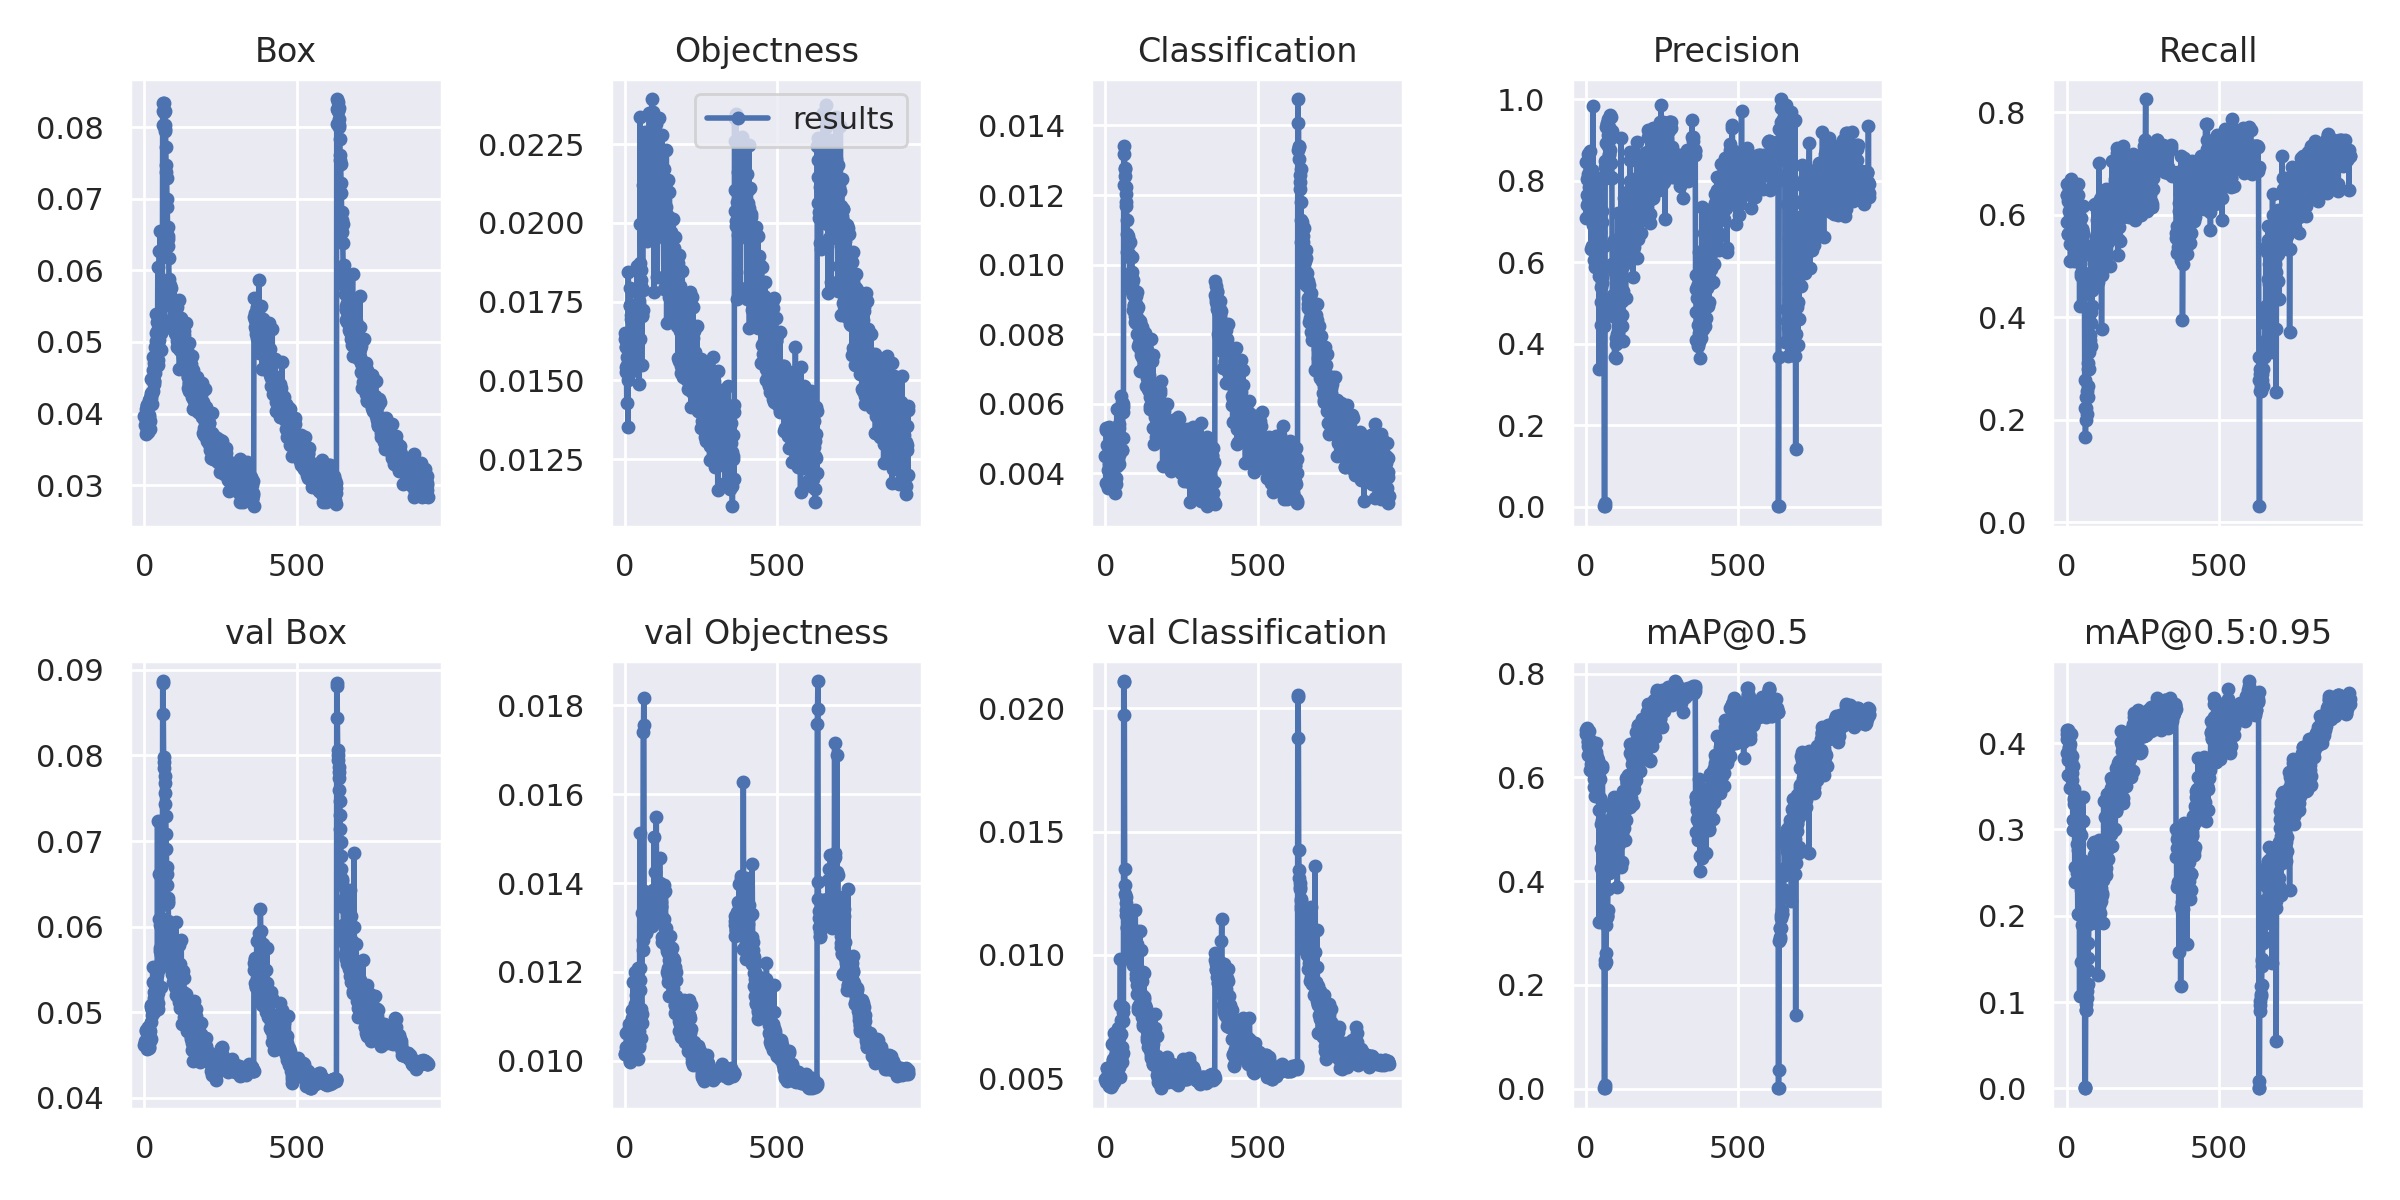

In [39]:
Image(filename='runs/train/baby-nc2-8bit/results.png', width=400)

In [41]:
!python test.py --data data/baby-nc2.yaml --weights ./runs/train/baby-nc2-8bit/weights/best.pt --imgs 640 --device 0 --batch-size 6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
test: data=data/baby-nc2.yaml, weights=['./runs/train/baby-nc2-8bit/weights/best.pt'], batch_size=6, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Fusing layers... 
Model Summary: 567 layers, 7066239 parameters, 0 gradients
test.py:nc: 2
##########################################1
val: Scanning '../datasets/baby_nc2/valid/labels.cache' images and labels... 40 
##########################################2
batch_size: 6
               Class     Images     Labels          P          R     mAP@.5 mAP@prediction.shape: torch.Size([6, 18522, 7])
prediction:nc 2
               Class     Images     Labels          P          R     mAP@.5 mAP@pr

In [43]:
!python detect.py --source data/images/baby.jpg --weights ./runs/train/baby-nc2-8bit/weights/best.pt --img 640 --device 0 --conf-thres 0.3 --iou-thres 0.6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
detect: weights=['./runs/train/baby-nc2-8bit/weights/best.pt'], source=data/images/baby.jpg, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
save_img=True
webcam=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

weights=./runs/train/baby-nc2-8bit/weights/best.pt
chkpt={'nc': 2, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Focus', [64, 3]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 9, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, 

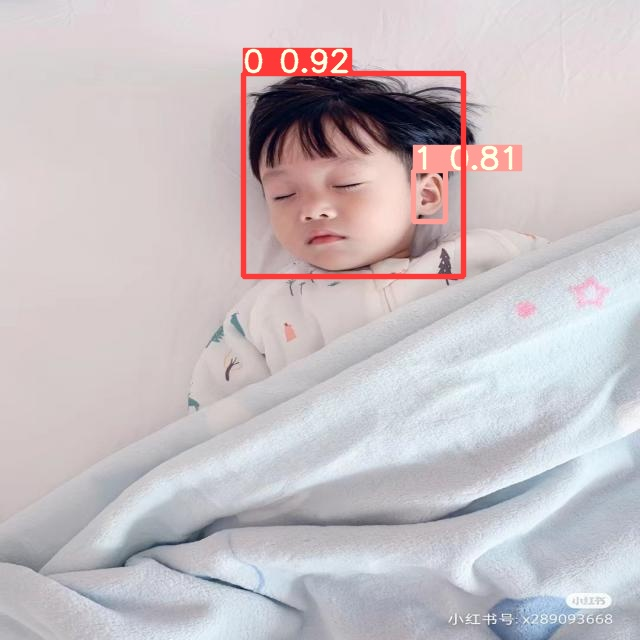

In [44]:
Image(filename='runs/detect/exp9/baby.jpg', width=600)

# 4Bit Training

In [54]:
!sed -i 's/bita = .*/bita = 4/g' models/common.py
!sed -i 's/nc: .*/nc: 2/g' models/yolov5s.yaml
!python3 -m torch.distributed.launch --nproc_per_node=1 --master_port=60051 train.py \
    --data data/baby-nc2.yaml\
    --cfg models/yolov5s.yaml \
    --weights './runs/train/baby-nc2-8bit/weights/best.pt' \
    --batch-size 8 \
    --hyp data/hyp.scratch-4bit.yaml \
    --project ./runs/train/baby-nc2-4bit \
    --epochs 300 \
    --device 0

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
train: weights=./runs/train/baby-nc2-8bit/weights/best.pt, cfg=models/yolov5s.yaml, data=data/baby-nc2.yaml, hyp=data/hyp.scratch-4bit.yaml, epochs=300, batch_size=8, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=0, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=./runs/train/baby-nc2-4bit, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=0
github: skipping check (offline), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Added key: store_based_barrier_key:1 to store for rank: 0
hyperparameters: lr0=0.001, lrf=0.02, momentum=0.937, weight

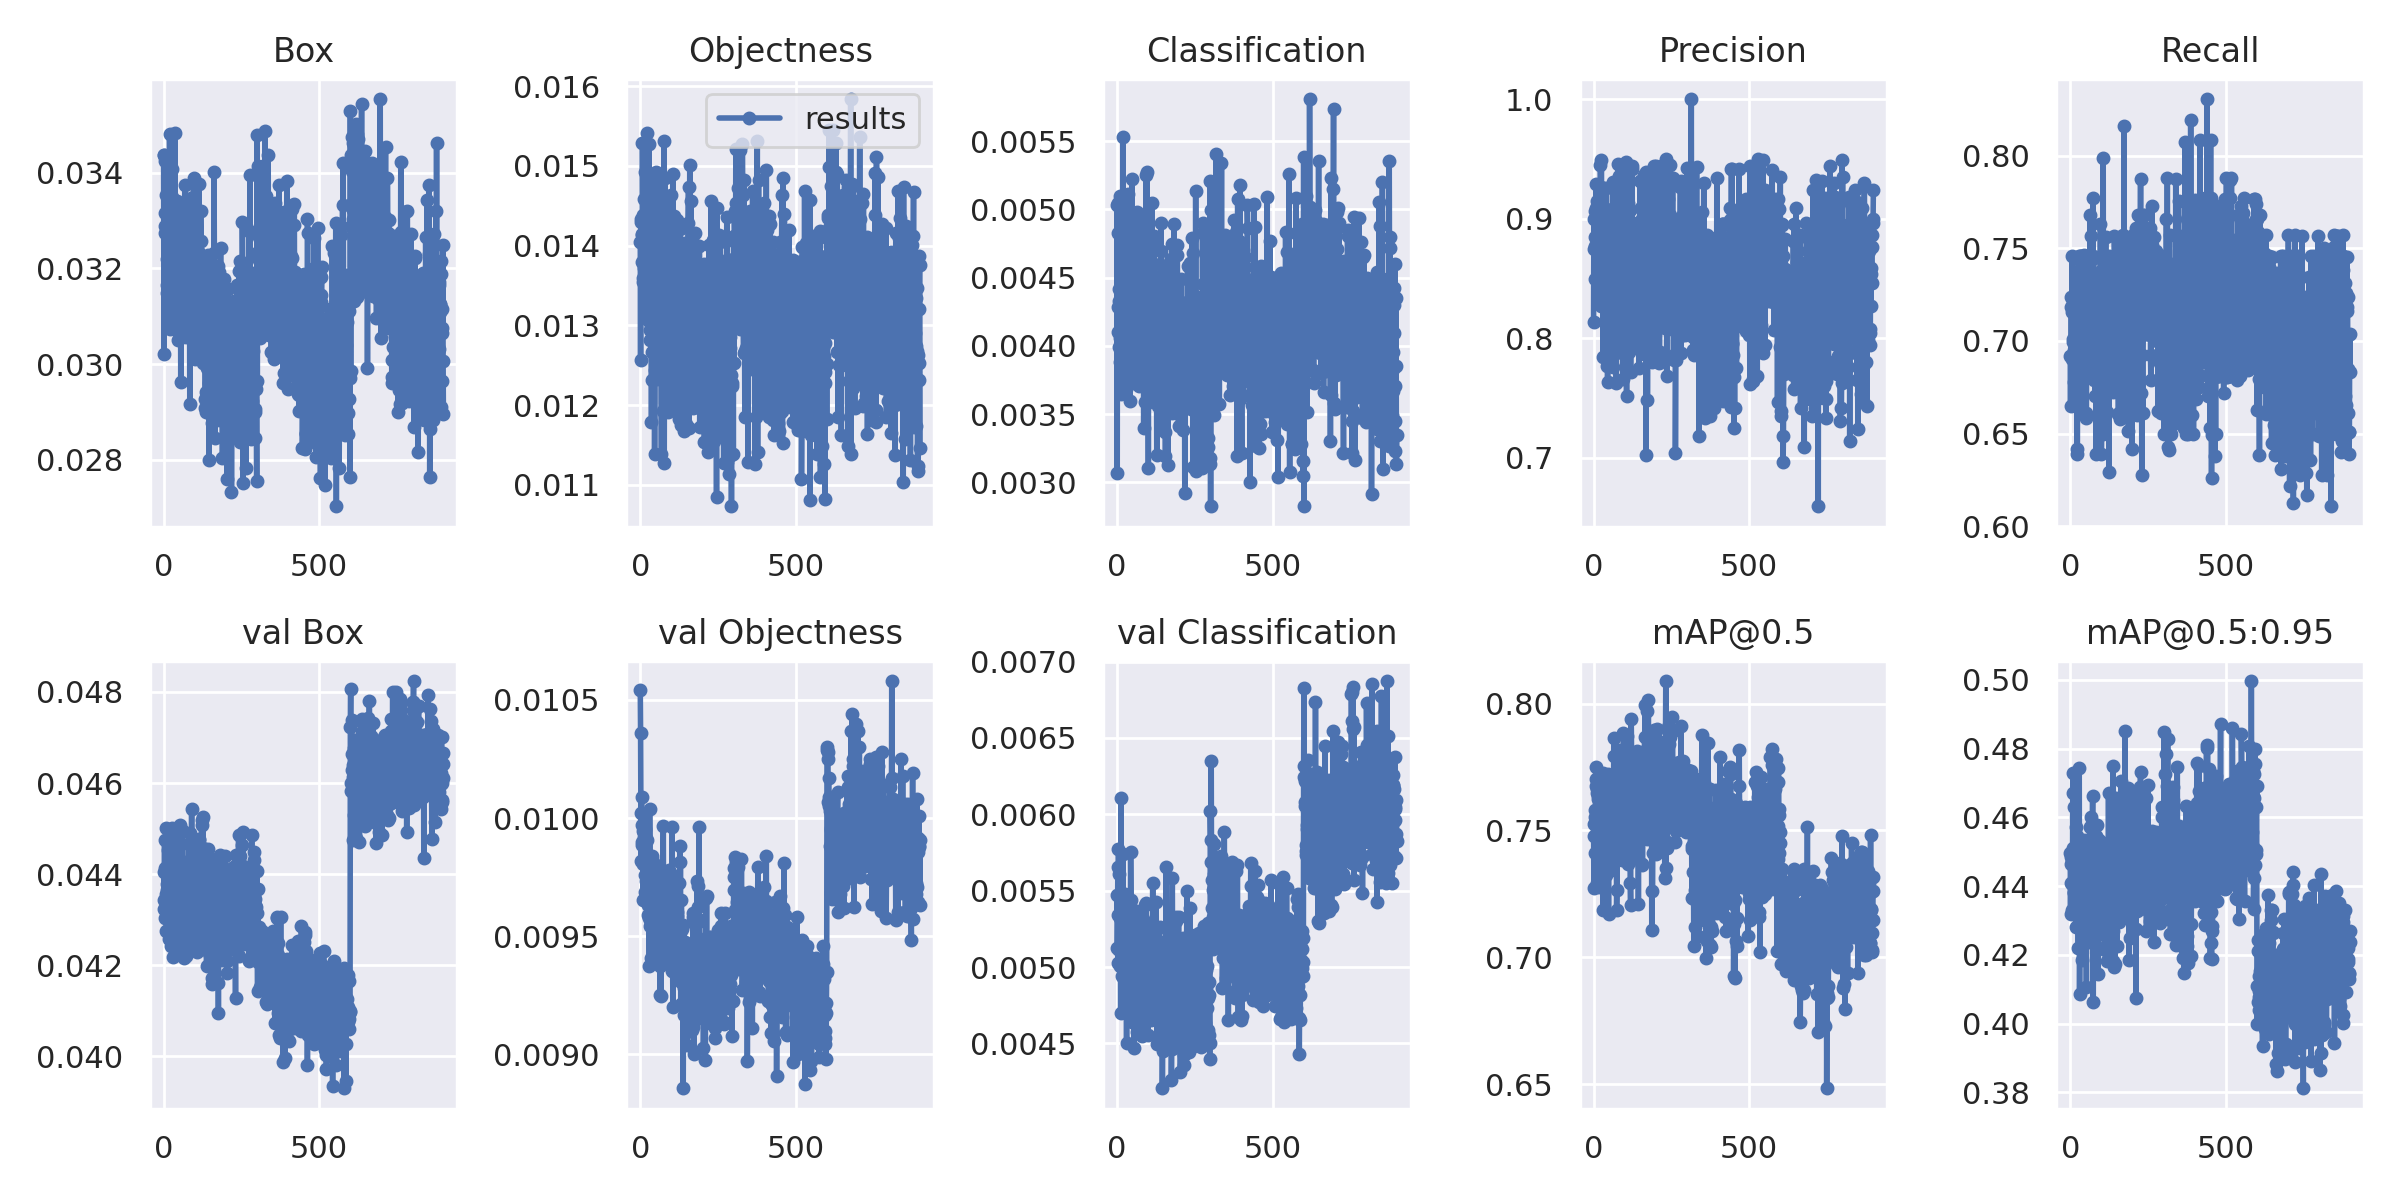

In [46]:
Image(filename='runs/train/baby-nc2-4bit/results.png', width=400)

In [47]:
!python test.py --data data/baby-nc2.yaml --weights ./runs/train/baby-nc2-4bit/weights/best.pt --imgs 640 --device 0 --batch-size 6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
test: data=data/baby-nc2.yaml, weights=['./runs/train/baby-nc2-4bit/weights/best.pt'], batch_size=6, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=0, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

Fusing layers... 
Model Summary: 567 layers, 7066239 parameters, 0 gradients
test.py:nc: 2
##########################################1
val: Scanning '../datasets/baby_nc2/valid/labels.cache' images and labels... 40 
##########################################2
batch_size: 6
               Class     Images     Labels          P          R     mAP@.5 mAP@prediction.shape: torch.Size([6, 18522, 7])
prediction:nc 2
               Class     Images     Labels          P          R     mAP@.5 mAP@pr

In [48]:
!python detect.py --source data/images/baby.jpg --weights ./runs/train/baby-nc2-4bit/weights/best.pt --img 640 --device 0 --conf-thres 0.3 --iou-thres 0.6

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
detect: weights=['./runs/train/baby-nc2-4bit/weights/best.pt'], source=data/images/baby.jpg, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
save_img=True
webcam=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

weights=./runs/train/baby-nc2-4bit/weights/best.pt
chkpt={'nc': 2, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Focus', [64, 3]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 9, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, 

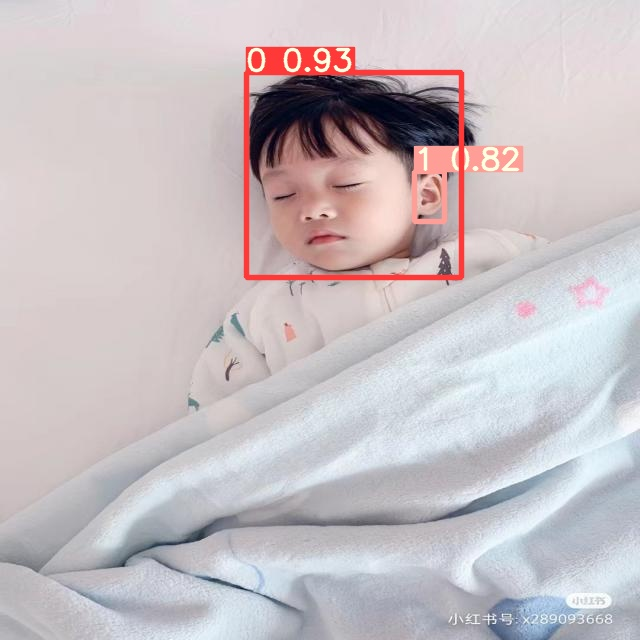

In [49]:
Image(filename='runs/detect/exp10/baby.jpg', width=400)

In [50]:
!python detect.py --source data/video/baby.mp4 --weights ./runs/train/baby-nc2-4bit/weights/best.pt --img 640 --device 0

INFO(magik): trainingkit version:1.1.1(00010101_5f9da5c)  built:20221103-1145(5.5.0 pytorch)
detect: weights=['./runs/train/baby-nc2-4bit/weights/best.pt'], source=data/video/baby.mp4, imgsz=640, conf_thres=0.3, iou_thres=0.6, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
save_img=True
webcam=False
YOLOv5 🚀 dbadd01 torch 1.8.0 CUDA:0 (NVIDIA GeForce GTX 1060, 6071.5MB)

weights=./runs/train/baby-nc2-4bit/weights/best.pt
chkpt={'nc': 2, 'depth_multiple': 0.33, 'width_multiple': 0.5, 'anchors': [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], 'backbone': [[-1, 1, 'Focus', [64, 3]], [-1, 1, 'Conv', [128, 3, 2]], [-1, 3, 'C3', [128]], [-1, 1, 'Conv', [256, 3, 2]], [-1, 9, 'C3', [256]], [-1, 1, 'Conv', [512, 3, 2]], [-1, 9, '